# Análise exploratória de dados referente às admissões universitárias relacionadas à Tecnologia da Informação.
Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) para obter insights sobre as admissões acadêmicas nos cursos de Tecnologia da Informação (TI) em universidades. O objetivo é identificar padrões de escolha de cursos de estudo e campos de especialização entre os futuros profissionais que ingressarão no mercado de trabalho.
   - A base de dados foi disponibilizada na plataforma Kaggle
   - Pode ser utilizada como uma projeção de futura mão de obra na industria da Tecnologia da Informação

In [19]:
import pandas as pd

df = pd.read_csv('data/student_data.csv')
df.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [20]:
df.shape

(200000, 10)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Date of Birth                200000 non-null  object
 3   Field of Study               200000 non-null  object
 4   Year of Admission            200000 non-null  int64 
 5   Expected Year of Graduation  200000 non-null  int64 
 6   Current Semester             200000 non-null  int64 
 7   Specialization               200000 non-null  object
 8   Fees                         200000 non-null  int64 
 9   Discount on Fees             200000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.3+ MB


Felizmente o dataset parece já ter vindo bastante limpo, permitindo apenas a análise

In [22]:
df.isnull().sum() / len(df) * 100

Student ID                     0.0
Student Name                   0.0
Date of Birth                  0.0
Field of Study                 0.0
Year of Admission              0.0
Expected Year of Graduation    0.0
Current Semester               0.0
Specialization                 0.0
Fees                           0.0
Discount on Fees               0.0
dtype: float64

## Transformação de Dados

In [23]:
df.drop(columns=['Student ID', 'Student Name'], axis=1, inplace=True)

In [24]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], format='%Y-%m-%d')
df['Year of Admission'] = pd.to_datetime(df['Year of Admission'], format='%Y')
df['Expected Year of Graduation'] = pd.to_datetime(df['Expected Year of Graduation'], format='%Y')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Date of Birth                200000 non-null  datetime64[ns]
 1   Field of Study               200000 non-null  object        
 2   Year of Admission            200000 non-null  datetime64[ns]
 3   Expected Year of Graduation  200000 non-null  datetime64[ns]
 4   Current Semester             200000 non-null  int64         
 5   Specialization               200000 non-null  object        
 6   Fees                         200000 non-null  int64         
 7   Discount on Fees             200000 non-null  int64         
dtypes: datetime64[ns](3), int64(3), object(2)
memory usage: 12.2+ MB


In [26]:
df.head()

,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,2006-01-19,Computer Science,2020-01-01,2017-01-01,3,Web Development,155152,19572
1,1999-05-23,Mechanical Engineering,2020-01-01,2020-01-01,2,Machine Learning,157870,14760
2,1997-12-02,Civil Engineering,2017-01-01,2022-01-01,1,Network Security,55662,5871
3,1999-10-30,Computer Science,2021-01-01,2019-01-01,1,Data Science,134955,17284
4,1998-01-10,Chemical Engineering,2016-01-01,2018-01-01,1,Network Security,125934,14871


In [27]:
df.duplicated().sum()

0

O dataset parace bastante limpo, precisei apenas mudar o dtype de algumas colunas de númerica para datetime.

## Análise Exploratória

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='darkgrid')

<Axes: >

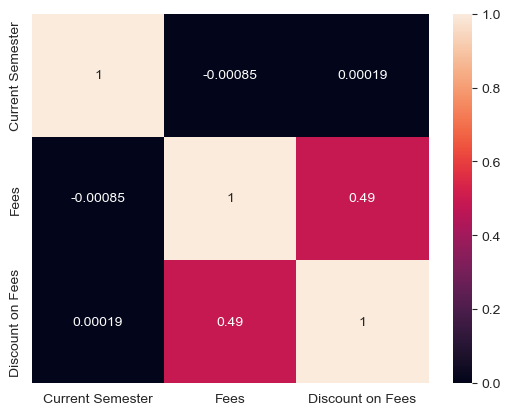

In [29]:
sns.heatmap(df.corr(method='pearson', numeric_only=True), fmt='.2g', annot=True)

In [30]:
df['Field of Study'].value_counts()

Electrical Engineering    40305
Chemical Engineering      40020
Computer Science          39960
Mechanical Engineering    39941
Civil Engineering         39774
Name: Field of Study, dtype: int64

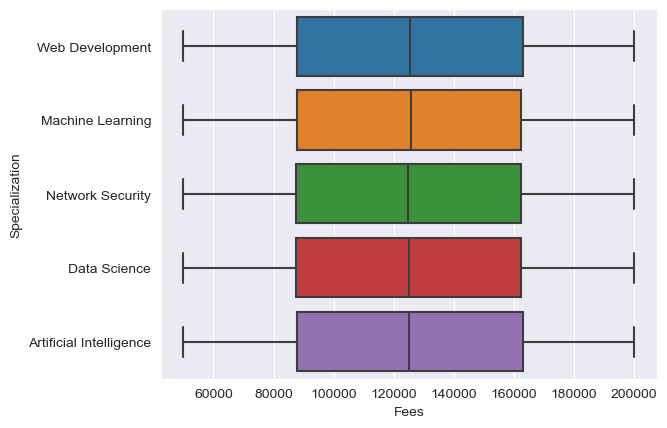

In [39]:
sns.boxplot(data=df, x='Fees', y='Specialization');

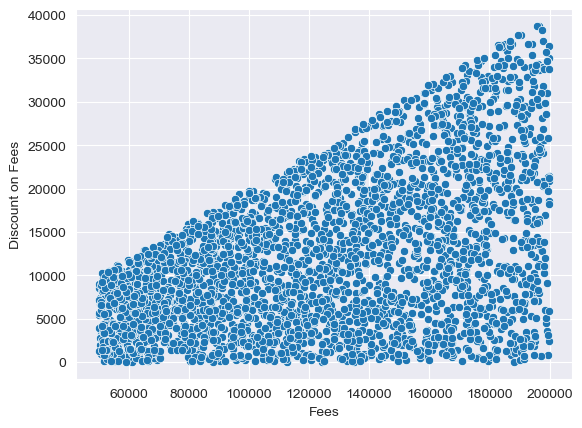

In [47]:
df_sample = df.sample(3000)
sns.scatterplot(data=df_sample, x='Fees', y='Discount on Fees');

In [ ]:
sns.histplot(data=df, x='Fees', y='D')

<Axes: xlabel='Fees', ylabel='Field of Study'>

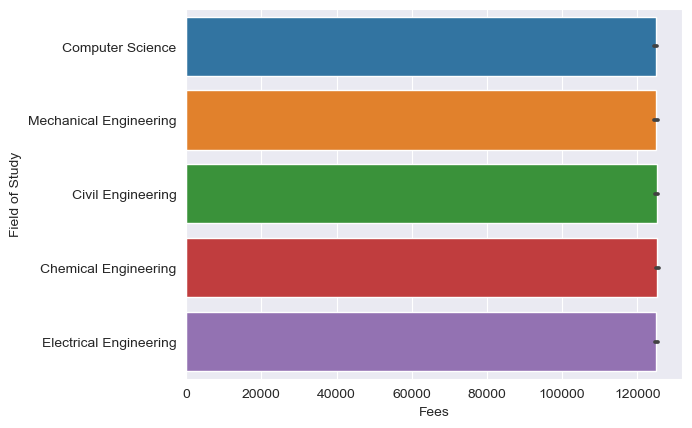

In [54]:
sns.barplot(data=df, x='Fees', y='Field of Study', estimator='mean', orient='h')

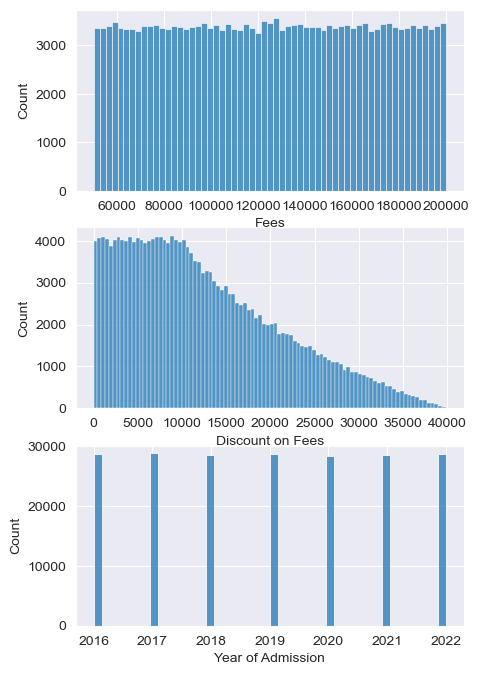

In [65]:
viz_distribuition = ['Fees', 'Discount on Fees', 'Year of Admission']
plt.figure(figsize=(5,8))
for i, column_name in enumerate(viz_distribuition):
    plt.subplot(len(viz_distribuition),1,i+1)
    sns.histplot(data=df, x=column_name);

A alta limpeza e padronização dos dados são indícios de que esse dataset não representa o perfil atual dos universitários ingressantes em cursos relacionados a Tecnologia da Informação, isso dificulta a descoberta de insights e possíveis projeções futuras devido a inconfiabilidade dos dados. Estarei encerrando o projeto.

## Proposição de Perguntas:
- Qual o curso mais escolhido?
- Qual o preço medio de cada curso?
- Qual a relação entre o custo da faculdade e os descontos?
- Quais os campos de especialização mais escolhidos?

## Conclusão e Insights:
- Projeto interrompido.